### 1. Importing the Libraries

### Here , we are importing all the necassary libraries that will be used in the project 

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")



### 2. Importing the Dataset

#### Here , the dataset is used is heart.csv which is taken from kaggle.com  Link - https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Preprocessing -  Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process

### 3. Taking Care of Missing Values

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [143]:
df.duplicated().any()

True

In [10]:
df = df.drop_duplicates()
df.head(4)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [146]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

### 5. Data Processing

In [5]:
cate_val = []
cont_val = []
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [6]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [7]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### 7. Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [14]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


### 8. Splitting The Dataset Into The Training Set And Test Set

In [15]:
X = df.drop(df[cate_val] , axis=1)

In [16]:
y = df['output']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [19]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: output, Length: 61, dtype: int64

# Using the Various Classification Model to predict the Output values - 

### 9. Logistic Regression - Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

In [20]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test,y_pred1)*100

78.68852459016394

### 10. SVM - A support vector machine (SVM) is a supervised machine learning algorithm that solves two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

In [26]:
from sklearn import svm

In [27]:
svm = svm.SVC()

In [28]:
svm.fit(X_train,y_train)

SVC()

In [29]:
y_pred2 = svm.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred2)*100

77.04918032786885

### 11. KNeighbors Classifier - K-NN classification with K-means clustering. KNN is a supervised classification algorithm that classifies new data points based on the nearest data points

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier()

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred3=knn.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [36]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [37]:
score

[0.6557377049180327,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377]

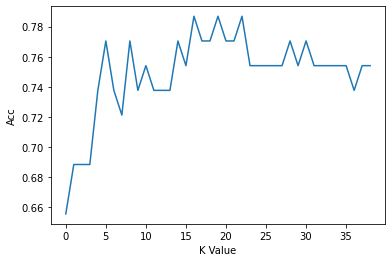

In [38]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [39]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)*100

68.85245901639344

### Non-Linear ML Algorithms - Non-Linear regression is a type of polynomial regression. It is a method to model a non-linear relationship between the dependent and independent variables. It is used in place when the data shows a curvy trend, and linear regression would not produce very accurate results when compared to non-linear regression.

### 12. Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred4= dt.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred4)

0.6557377049180327

### 13. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred5= rf.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred5)

0.7540983606557377

### 14. Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc = GradientBoostingClassifier()

In [52]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [53]:
y_pred6 = gbc.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred6)

0.7704918032786885

### All Models and their Accuracy-Scores 

In [57]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [58]:
final_data

,Models,ACC
0,LR,78.688525
1,SVM,77.049180
2,KNN,73.770492
3,DT,65.573770
4,RF,75.409836
5,GB,77.049180


<AxesSubplot:xlabel='Models', ylabel='ACC'>

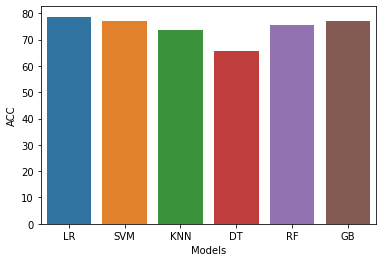

In [60]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [62]:
df[cate_val]

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [73]:
cols = df.columns
features = cols[:-1]
features

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [77]:
X_new = df[features]
y_new = df['output']
print(X_new , y_new )


          age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  \
0    0.949794    1   3  0.764066 -0.261285    1        0  0.018826     0   
1   -1.928548    1   2 -0.091401  0.067741    0        1  1.636979     0   
2   -1.485726    0   1 -0.091401 -0.822564    0        0  0.980971     0   
3    0.174856    1   1 -0.661712 -0.203222    0        1  1.243374     0   
4    0.285561    0   0 -0.661712  2.080602    0        1  0.587366     1   
..        ...  ...  ..       ...       ...  ...      ...       ...   ...   
298  0.285561    0   0  0.478910 -0.106449    0        1 -1.161988     1   
299 -1.042904    1   3 -1.232023  0.338703    0        1 -0.768384     0   
300  1.503322    1   0  0.707035 -1.035462    1        1 -0.374779     0   
301  0.285561    1   0 -0.091401 -2.235438    0        1 -1.511859     1   
302  0.285561    0   1 -0.091401 -0.203222    0        0  1.068439     0   

      oldpeak  slp  caa  thall  
0    1.084022    0    0      1  
1    2.118926    0   

### Random Forest Classifier 

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()
rf.fit(X_new,y_new)

RandomForestClassifier()

### Test Data values for the Random Forest for prediction of the heart diseases 

In [83]:
new_data1 = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trtbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalachh':168,
    'exng':0,
    'oldpeak':1.0,
     'slp':2,
    'caa':2,
    'thall':3,    
},index=[0])

In [84]:
rf.predict(new_data1)

array([0], dtype=int64)

### 15. Prediction on New Data

#### Creating a data - frame of the new test data 

In [85]:
test_df = pd.DataFrame(new_data1 , index = [0])
test_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [87]:
p = rf.predict(test_df)
print(p)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

[0]
No Disease


### 16. Save Model Using Joblib

In [88]:
import joblib

In [89]:
joblib.dump(rf,'model_joblib_heart1')

['model_joblib_heart1']

In [90]:
model = joblib.load('model_joblib_heart1')

In [92]:
model.predict(test_df)

array([0], dtype=int64)

### GUI - Graphical User Interface using Tkinter python library 

In [93]:
#import tkinter as tk
from tkinter import *
import joblib

In [96]:
from PIL import ImageTk,Image 

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")
#master.iconbitmap("doc.png")
#master.geometry('800x400')

master.configure(background = "#0096DC")

#img1 = PhotoImage(name="img" , file ="doc.png")
#label1 = Label(master , image = img1 , bd = 5 , relief = SUNKEN)
#label1.pack(padx = 10 , pady = 10 )


label = Label(master, text = "Heart Disease Prediction System" , bg = "black", fg = "white").grid(row=0,columnspan=5)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

# The End 